In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn

## 1. Загрузка и подготовка данных

In [2]:
url = "https://raw.githubusercontent.com/valeria-vag/machine-learning-course/main/hotel_booking.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(119390, 36)

In [3]:
data_raw["country"]

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

Удалим несколько признаков, никак не влияющих на финальный результат.
Так же на большинстве сайтов бронирования обычно указаны только категории гостей и детей (до 18 лет), поэтому мы можем объединить значения детей и младенцев в колонке дети

In [4]:
del data_raw['name']
del data_raw['email']
del data_raw['phone-number']
del data_raw['credit_card']

In [5]:
data_raw['kids'] = data_raw['children'] + data_raw['babies']

In [6]:
del data_raw['children']
del data_raw['babies']

Как было замечено в первой лабораторной, мы имеем два признака "country" и "kids", которые имеют незначительный процент пропущенных значений (0.409%, 0.003% соответственно). Поэтому строки с пропущенными значениями можно удалить.  

In [7]:
data_raw.dropna(axis=0, how='all', subset=['country'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['kids'], inplace=True)
print(data_raw.shape)
data_raw.isna().sum()

(118898, 31)


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16004
company                           112275
days_in_waiting_list                   0
customer_type   

Для двух других признаков (company - 94%, agent - 14%) заполним пропущенные значения медианными:

In [8]:
data_raw.median(axis = 0)

is_canceled                          0.0
lead_time                           69.0
arrival_date_year                 2016.0
arrival_date_week_number            28.0
arrival_date_day_of_month           16.0
stays_in_weekend_nights              1.0
stays_in_week_nights                 2.0
adults                               2.0
is_repeated_guest                    0.0
previous_cancellations               0.0
previous_bookings_not_canceled       0.0
booking_changes                      0.0
agent                               14.0
company                            179.0
days_in_waiting_list                 0.0
adr                                 95.0
required_car_parking_spaces          0.0
total_of_special_requests            0.0
kids                                 0.0
dtype: float64

In [9]:
data_raw = data_raw.fillna(data_raw.median(axis = 0), axis = 0)
data_raw.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Избавимся от категориальных признаков с помощью метода бинаризации

In [10]:
data_raw['hotel'] = data_raw['hotel'].astype('category')
data_raw['arrival_date_month'] = data_raw['arrival_date_month'].astype('category')
data_raw['meal'] = data_raw['meal'].astype('category')
data_raw['country'] = data_raw['country'].astype('category')
data_raw['market_segment'] = data_raw['market_segment'].astype('category')
data_raw['distribution_channel'] = data_raw['distribution_channel'].astype('category')
data_raw['reserved_room_type'] = data_raw['reserved_room_type'].astype('category')
data_raw['assigned_room_type'] = data_raw['assigned_room_type'].astype('category')
data_raw['deposit_type'] = data_raw['deposit_type'].astype('category')
data_raw['customer_type'] = data_raw['customer_type'].astype('category')
data_raw['reservation_status'] = data_raw['reservation_status'].astype('category')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           118898 non-null  category
 1   is_canceled                     118898 non-null  int64   
 2   lead_time                       118898 non-null  int64   
 3   arrival_date_year               118898 non-null  int64   
 4   arrival_date_month              118898 non-null  category
 5   arrival_date_week_number        118898 non-null  int64   
 6   arrival_date_day_of_month       118898 non-null  int64   
 7   stays_in_weekend_nights         118898 non-null  int64   
 8   stays_in_week_nights            118898 non-null  int64   
 9   adults                          118898 non-null  int64   
 10  meal                            118898 non-null  category
 11  country                         118898 non-null  category
 12  ma

In [11]:
data_raw['reservation_status_date'] = data_raw['reservation_status_date'].transform(lambda s: int(s.replace('-', '').strip()))
data_raw = pd.get_dummies(data_raw)
print(data_raw.shape)
data_raw.head()

(118898, 260)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,27,1,0,0,2,0,0,...,1,0,0,0,0,1,0,0,1,0
1,0,737,2015,27,1,0,0,2,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,7,2015,27,1,0,1,1,0,0,...,1,0,0,0,0,1,0,0,1,0
3,0,13,2015,27,1,0,1,1,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,14,2015,27,1,0,2,2,0,0,...,1,0,0,0,0,1,0,0,1,0


Нормализируем количественные признаки:

In [12]:
data_normal = (data_raw - data_raw.min(axis=0)) / (data_raw.max(axis=0) - data_raw.min(axis=0))
data_normal.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,...,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,0.141535,0.578828,0.503203,0.493363,0.058056,0.061028,0.033789,0.032011,0.003352,...,0.876070,0.122567,0.001363,0.034281,0.004794,0.750004,0.210920,0.361234,0.628648,0.010118
std,0.483168,0.145052,0.353729,0.261346,0.292677,0.062264,0.046346,0.010520,0.176029,0.032533,...,0.329503,0.327941,0.036887,0.181952,0.069073,0.433012,0.407964,0.480360,0.483168,0.100078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.024423,0.500000,0.288462,0.233333,0.000000,0.024390,0.036364,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.093623,0.500000,0.519231,0.500000,0.062500,0.048780,0.036364,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.218453,1.000000,0.711538,0.733333,0.125000,0.073171,0.036364,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Разбиение данных на обучающую и тестовую выборки

In [16]:
X = data_normal.drop(['is_canceled'], axis=1)
y = data_raw['is_canceled'].astype(np.float32)

Разобъем данные на обучающую (66%) и тестовую (33%) выборки

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(79661, 39237)

## 3. Подбор гиперпараметров

В качестве алгоритма оптимизации выберем алгоритм Adam, в качестве функции активации выберем Relu, в качетве метрики оценки классификатора возьмем accuracy_score.

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

## Подбор количества нейронов для однослойной сети

In [19]:
hidden_layer_size = np.linspace(1, 50, 50)
hidden_layer_size = hidden_layer_size.astype(int)
test_err, train_err = [], []
train_acc, test_acc = [], []

for size in tqdm(hidden_layer_size):
    model = MLPClassifier(hidden_layer_sizes=(size,), 
                          solver='adam', activation='relu', max_iter=1000, random_state=13)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train.astype('int64'), y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [15:24<00:00, 18.50s/it]


Train: Min error=0.0, number of neurons=1
Test: Min error=0.0, number of neurons=1


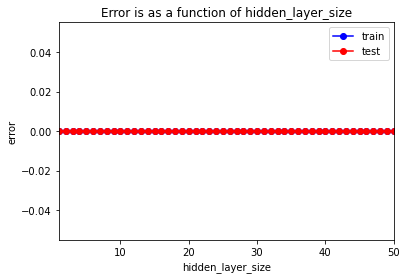

In [20]:
plt.plot(hidden_layer_size, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer_size, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Error is as a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('error')
plt.legend()

print("Train: Min error={0}, number of neurons={1}".format(np.min(train_err), hidden_layer_size[np.argmin(train_err)]))
print("Test: Min error={0}, number of neurons={1}".format(np.min(test_err), hidden_layer_size[np.argmin(test_err)]))

Train: max accuracy=1.0, number of neurons=1
Test: max accuracy=1.0, number of neurons=1


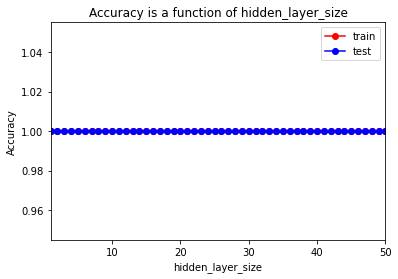

In [21]:
plt.plot(hidden_layer_size, train_acc, 'r-o', label = 'train')
plt.plot(hidden_layer_size, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Accuracy is a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('Accuracy')
plt.legend()

print("Train: max accuracy={0}, number of neurons={1}".format(np.max(train_acc), hidden_layer_size[np.argmax(train_acc)]))
print("Test: max accuracy={0}, number of neurons={1}".format(np.max(test_acc), hidden_layer_size[np.argmax(test_acc)]))

## Подбор количества нейронов в двуслойной сети:

In [22]:
n = 10
sizes = np.linspace(1, 50, n).astype(int)
test_err = np.zeros((n, n))
train_err = np.zeros((n, n))
train_acc = np.zeros((n, n))
test_acc = np.zeros((n, n))

for i, size_1 in tqdm(enumerate(sizes)):
    for j, size_2 in enumerate(sizes):
        model = MLPClassifier(hidden_layer_sizes=(size_1, size_2, ), 
                              solver='adam', activation='relu', max_iter=1000, random_state=13)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)

        train_acc[i][j] = accuracy_score(y_train, y_train_pred)
        test_acc[i][j] = accuracy_score(y_test, y_test_pred)

10it [32:23, 194.34s/it]


Train: Min error=0.0, number of neurons=0,15
Test: error=0.0, number of neurons=0,15

Test: Min error=0.0, number of neurons=0,15
Train: error=0.0, number of neurons=0,15



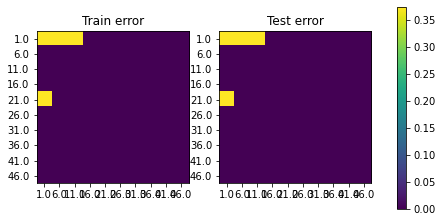

In [23]:
plt.subplot(121)
plt.title("Train error")
plt.imshow(train_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test error")
plt.imshow(test_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.96, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_min_loss = np.where(train_err == np.min(train_err))
test_min_loss = np.where(test_err == np.min(test_err))

train_min_loss_sizes = [train_min_loss[0][0] * 5, train_min_loss[1][0] * 5]
test_min_loss_sizes = [test_min_loss[0][0] * 5, test_min_loss[1][0] * 5]

print("Train: Min error={0}, number of neurons={1},{2}".format(np.min(train_err), train_min_loss_sizes[0], train_min_loss_sizes[1]))
print("Test: error={0}, number of neurons={1},{2}\n".format(test_err[train_min_loss][0], train_min_loss_sizes[0], train_min_loss_sizes[1]))
print("Test: Min error={0}, number of neurons={1},{2}".format(np.min(test_err), test_min_loss_sizes[0], test_min_loss_sizes[1]))
print("Train: error={0}, number of neurons={1},{2}\n".format(train_err[test_min_loss][0], test_min_loss_sizes[0], test_min_loss_sizes[1]))

Train: Max accuracy=1.0, number of neurons=0,15
Test: accuracy=1.0, number of neurons=0,15

Test: Max accuracy=1.0, number of neurons=0,15
Train: accuracy=1.0, number of neurons=0,15



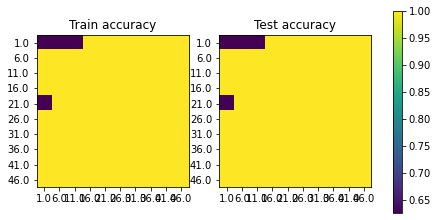

In [24]:
plt.subplot(121)
plt.title("Train accuracy")
plt.imshow(train_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test accuracy")
plt.imshow(test_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.95, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_max_acc = np.where(train_acc == np.max(train_acc))
test_max_acc = np.where(test_acc == np.max(test_acc))

train_max_acc_sizes = [train_max_acc[0][0] * 5, train_max_acc[1][0] * 5]
test_max_acc_sizes = [test_max_acc[0][0] * 5, test_max_acc[1][0] * 5]

print("Train: Max accuracy={0}, number of neurons={1},{2}".format(np.max(train_acc), train_max_acc_sizes[0], train_max_acc_sizes[1]))
print("Test: accuracy={0}, number of neurons={1},{2}\n".format(test_acc[train_max_acc][0], train_max_acc_sizes[0], train_max_acc_sizes[1]))
print("Test: Max accuracy={0}, number of neurons={1},{2}".format(np.max(test_acc), test_max_acc_sizes[0], test_max_acc_sizes[1]))
print("Train: accuracy={0}, number of neurons={1},{2}\n".format(train_acc[test_max_acc][0], test_max_acc_sizes[0], test_max_acc_sizes[1]))

## Подбор параметра регуляризации

In [25]:
alphas = np.logspace(-5, 5, 50)
test_err, train_err = [], []
train_acc, test_acc = [], []


for alpha in tqdm(alphas):
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (35,10,), 
                              solver='adam', activation='relu', max_iter=1000, random_state=13)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [18:05<00:00, 21.70s/it]


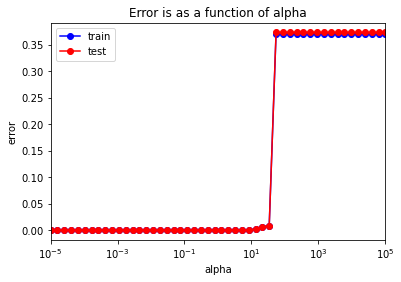

In [26]:
plt.semilogx(alphas, train_err, 'b-o', label = 'train')
plt.semilogx(alphas, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alphas), np.max(alphas)])
plt.title('Error is as a function of alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

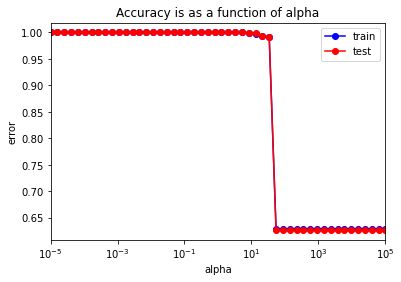

In [27]:
plt.semilogx(alphas, train_acc, 'b-o', label = 'train')
plt.semilogx(alphas, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alphas), np.max(alphas)])
plt.title('Accuracy is as a function of alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

## Вывод

Ошибка "0" все время, значит гиперпараметры в исследуемом диапазоне (альфа и число нейронов) не влияют на точность на данном датасете.
Так как мы не имеем 100% корреляции, то есть нет столбца по которому однозначно можем определить класс, то значит это является особенностью датасета.